# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(8)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

### Estou tratando os dados antes de criar os gráficos

In [3]:
#Alterando o tipo das colunas Salário e Limite_Crédito para fazer os cálculos necessários
df['Salário'] = df['Salário'].astype(int)
df['Limite_Credito'] = df['Limite_Credito'].astype(int)

#Alterando o conteúdo dos dados da coluna "historico_inadimplente", para melhor visualização nos gráficos
mapeamento_historico_inadimplente = {
    '1': 'Sim',
    '0': 'Não'
}

df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].replace(mapeamento_historico_inadimplente)


#Alterando o conteúdo dos dados da coluna "imovel_proprio", para melhor visualização nos gráficos
mapeamento_imovel_proprio = {
    '1': 'Sim',
    '0': 'Não'
}

df['Imovel_Proprio'] = df['Imovel_Proprio'].replace(mapeamento_imovel_proprio)

print('Tipo de dados: \n', df.dtypes)
df.head(8)

Tipo de dados: 
 Nome                       object
Idade                       int64
Profissão                  object
Salário                     int64
Limite_Credito              int64
Historico_Inadimplencia    object
Estado_Civil               object
Imovel_Proprio             object
dtype: object


,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,Não,Casamento,Não
1,Joao,30,Médico,8000,4000,Não,Casamento,Não
2,Charlie,35,Professor,5000,4000,Não,Solteiro,Não
3,David,40,Advogado,10000,1000,Sim,Solteiro,Sim
4,Eva,45,Médico,12000,10000,Não,Casamento,Sim
5,Diego,60,Engenheiro,15000,2000,Sim,Solteiro,Sim
6,Denize,22,Estudante,1200,500,Não,Solteiro,Não
7,Claudio,24,Estudante,1500,250,Sim,Solteiro,Não


In [14]:
# Calculando a média do Salário para cada Idade
media_salario_por_idade = df.groupby('Idade')['Salário'].mean()

# Ordenando as idades em ordem crescente
media_salario_por_idade = media_salario_por_idade.sort_index()

# Calculando a média do Limite de Crédito para cada Idade
media_limite_credito_por_idade = df.groupby('Idade')['Limite_Credito'].mean()

# Ordenando as idades em ordem crescente
media_limite_credito_por_idade = media_limite_credito_por_idade.sort_index()

print(media_limite_credito_por_idade.head(8))
print(media_salario_por_idade.head(8))

Idade
22      500.0
24      250.0
25     2500.0
30     4000.0
35     4000.0
40     1000.0
45    10000.0
60     2000.0
Name: Limite_Credito, dtype: float64
Idade
22     1200.0
24     1500.0
25     4500.0
30     8000.0
35     5000.0
40    10000.0
45    12000.0
60    15000.0
Name: Salário, dtype: float64


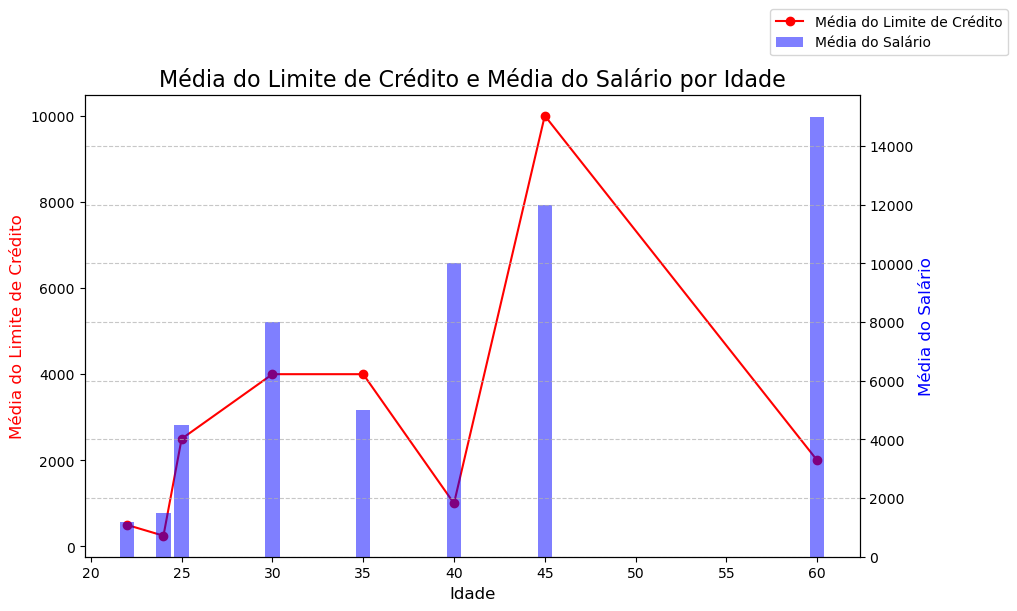

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(media_limite_credito_por_idade.index, media_limite_credito_por_idade, marker='o', color='red', label='Média do Limite de Crédito')
ax1.set_xlabel('Idade', fontsize=12)
ax1.set_ylabel('Média do Limite de Crédito', color='red', fontsize=12)

ax2 = ax1.twinx()
ax2.bar(media_salario_por_idade.index, media_salario_por_idade, color='blue', alpha=0.5, label='Média do Salário')
ax2.set_ylabel('Média do Salário', color='blue', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.2, 1.2))
# Neste código, bbox_to_anchor=(1.2, 1.2) especifica que a legenda será posicionada a uma distância de 1.2 unidades da largura do gráfico e 1.2 unidade da altura do gráfico

plt.title('Média do Limite de Crédito e Média do Salário por Idade', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

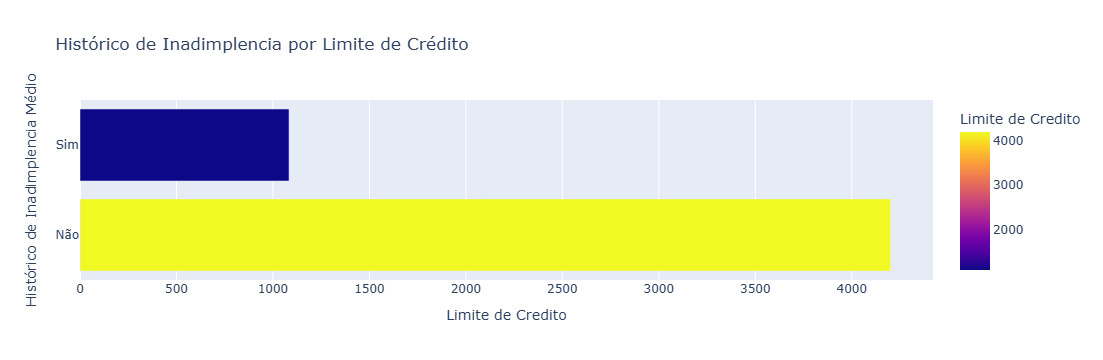

In [46]:
#Gráfico de barras horizontais, Histórico de Inandimplência por Limite de Crédito Médio
limite_credito_por_historico_inadimplencia = df.groupby(['Historico_Inadimplencia'])['Limite_Credito'].mean().reset_index()

fig = px.bar(limite_credito_por_historico_inadimplencia, x='Limite_Credito', y='Historico_Inadimplencia', orientation='h',
             title='Histórico de Inadimplencia por Limite de Crédito',
             labels={'Limite_Credito': 'Limite de Credito', 'Historico_Inadimplencia': 'Histórico de Inadimplencia Médio'},
             color='Limite_Credito',  # Especificando a cor baseada nos valores de salário
             width=800)        # Definindo a largura do gráfico em pixels

fig.show()
     

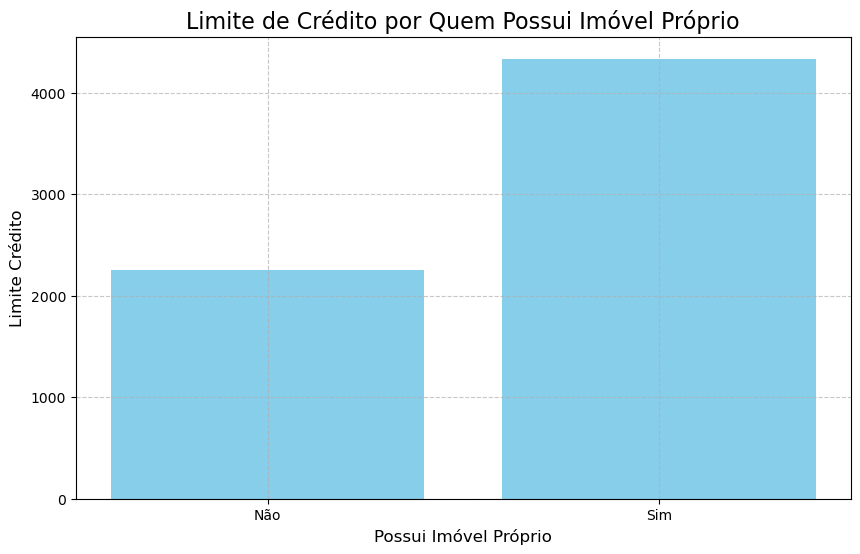

In [49]:
plt.figure(figsize=(10, 6))

limite_credito_por_imovel_proprio = df.groupby('Imovel_Proprio')['Limite_Credito'].mean()

plt.bar(limite_credito_por_imovel_proprio.index, limite_credito_por_imovel_proprio, color='skyblue')

plt.title('Limite de Crédito por Quem Possui Imóvel Próprio', fontsize=16)

plt.xlabel('Possui Imóvel Próprio', fontsize=12)

plt.ylabel('Limite Crédito', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()

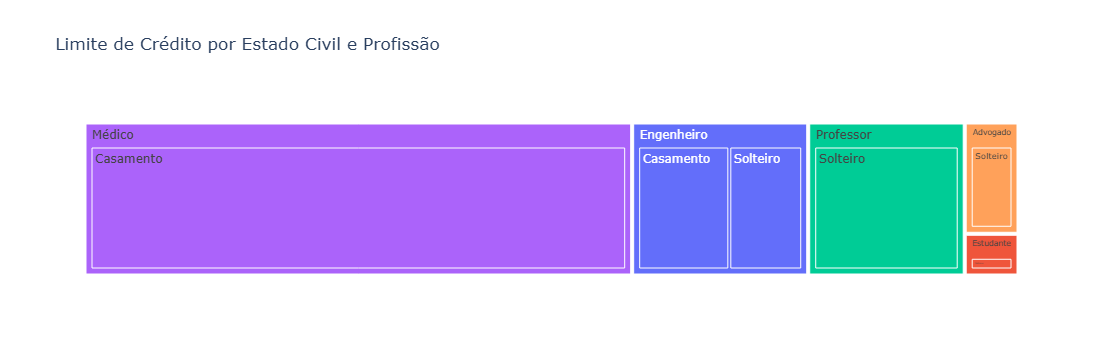

In [44]:
limite_credito_por_profissao_estadocivil = df.groupby(['Estado_Civil', 'Profissão'])['Limite_Credito'].mean().reset_index()

fig = px.treemap(limite_credito_por_profissao_estadocivil,
                path=['Profissão', 'Estado_Civil'],
                values='Limite_Credito',
                title='Limite de Crédito por Estado Civil e Profissão',
                color='Profissão')
fig.show()